In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data = pd.read_excel("Analytic_test.xlsx", index_col=0, header=1)
old_data = data.copy()
old_data.head()

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Обзор
Информация по активнсти присутствует только для компании Blue, что не дает нам провести сравнение. Присутствует колонка active_Red, которая задана не по шаблону, и в которой данные представлены лишь 0 и 1.
Колонки has_"company"_id нет для компании Red.
Имеются аномальные значение в виде даты там, где должно быть количество.

In [65]:
data.dtypes

HID                       object
active_Red               float64
has_Green_id             float64
has_Black_id             float64
has_Blue_id              float64
Blue_activity_count       object
Blue_gmv_total           float64
Green_gvm_total          float64
Green_gvm_order_count     object
Black_gvm_total          float64
Black_gvm_order_count     object
Red_android              float64
Green_android            float64
Black_android            float64
Blue_android             float64
Red_apple                float64
Green_apple              float64
Black_apple              float64
Blue_apple               float64
is_msk                   float64
Red_web                  float64
Green_web                float64
Black_web                float64
Blue_web                 float64
dtype: object

In [66]:
#Избавляемся от аномалий
data['Black_gvm_order_count'] = pd.to_numeric(data['Black_gvm_order_count'], errors='coerce')
data['Green_gvm_order_count'] = pd.to_numeric(data['Green_gvm_order_count'], errors='coerce')
data['Blue_activity_count'] = pd.to_numeric(data['Blue_activity_count'], errors='coerce')
data.dropna(inplace=True)

In [76]:
print(data.shape)
pd.concat([data.isnull().any(), data.dtypes], axis=1)

(99986, 24)


,0,1
HID,False,object
active_Red,False,float64
has_Green_id,False,float64
has_Black_id,False,float64
has_Blue_id,False,float64
Blue_activity_count,False,float64
Blue_gmv_total,False,float64
Green_gvm_total,False,float64
Green_gvm_order_count,False,float64
Black_gvm_total,False,float64


# Анализ

Посмотрим, сколько человек из Москвы имеют аккаунт.

In [113]:
hbi = pd.DataFrame(data.groupby('is_msk')['has_Black_id'].agg('sum')).reset_index()
hgi = pd.DataFrame(data.groupby('is_msk')['has_Green_id'].agg('sum')).reset_index()
hbui = pd.DataFrame(data.groupby('is_msk')['has_Blue_id'].agg('sum')).reset_index()
pd.concat([hbi, hgi, hbui], axis=1)

,is_msk,has_Black_id,is_msk,has_Green_id,is_msk,has_Blue_id
0,0.0,690.0,0.0,207.0,0.0,11575.0
1,1.0,388.0,1.0,676.0,1.0,2201.0


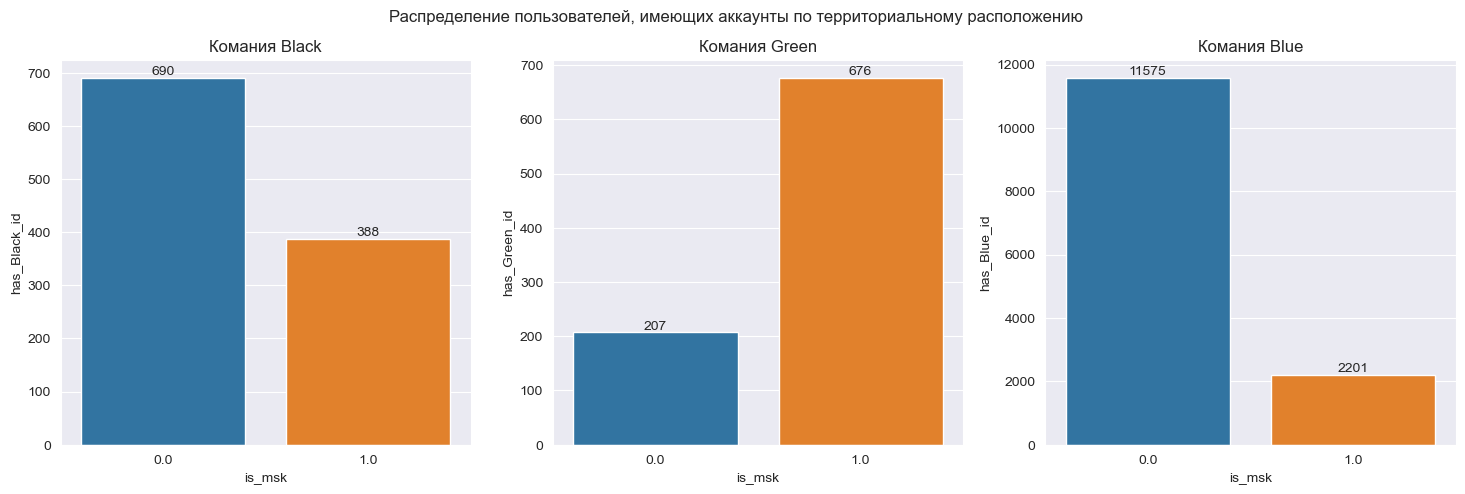

In [157]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 5))
sns.barplot(data=hbi, x='is_msk', y='has_Black_id', ax=axs[0])
sns.barplot(data=hgi, x='is_msk', y='has_Green_id', ax=axs[1])
sns.barplot(data=hbui, x='is_msk', y='has_Blue_id', ax=axs[2])

axs[0].set_title('Комания Black')
axs[1].set_title('Комания Green')
axs[2].set_title('Комания Blue')

for i in axs[0].containers:
    axs[0].bar_label(i,)
for i in axs[1].containers:
    axs[1].bar_label(i,)
for i in axs[2].containers:
    axs[2].bar_label(i,)

fig.suptitle('Распределение пользователей, имеющих аккаунты по территориальному расположению')

plt.show()

Можно сделать вывод, что компания Blue доминирует как внутри, так и за пределами Москвы. Компания Black доминирует больше за пределами Москвы в сравнении с компанией Green, а Green внутри.

-----------

Рассмотрим распределение пользователей по компаниям.

In [149]:
blackUsersCount = data['has_Black_id'].sum()
greenUsersCount = data['has_Green_id'].sum()
blueUsersCount = data['has_Blue_id'].sum()
pie = [blackUsersCount, greenUsersCount, blueUsersCount]
pie

[1078.0, 883.0, 13776.0]

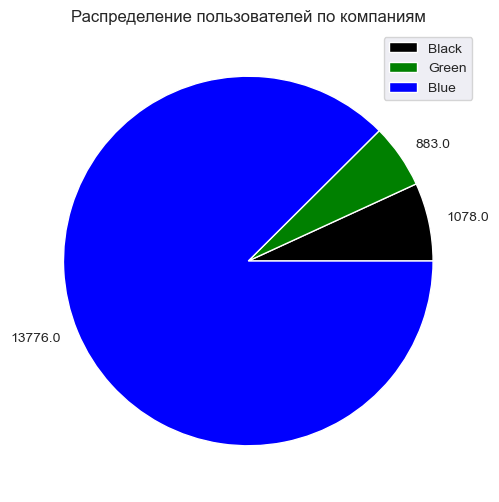

In [173]:
fig = plt.figure(figsize=[6,6])
plt.pie(pie, labels=pie, colors=['black', 'green', 'blue'])

plt.title('Распределение пользователей по компаниям')
plt.legend(['Black', 'Green', 'Blue'])

plt.show()

Компания Blue доминирует по числу пользователей

-------------

Сравним суммарные gmv пользователей

In [174]:
blackgmv = data['Black_gvm_total'].sum()
greengmv = data['Green_gvm_total'].sum()
bluegmv = data['Blue_gmv_total'].sum()
gmv =[blackgmv, greengmv, bluegmv]
gmv

[9468220.0, 5983080.0, 246098.0]

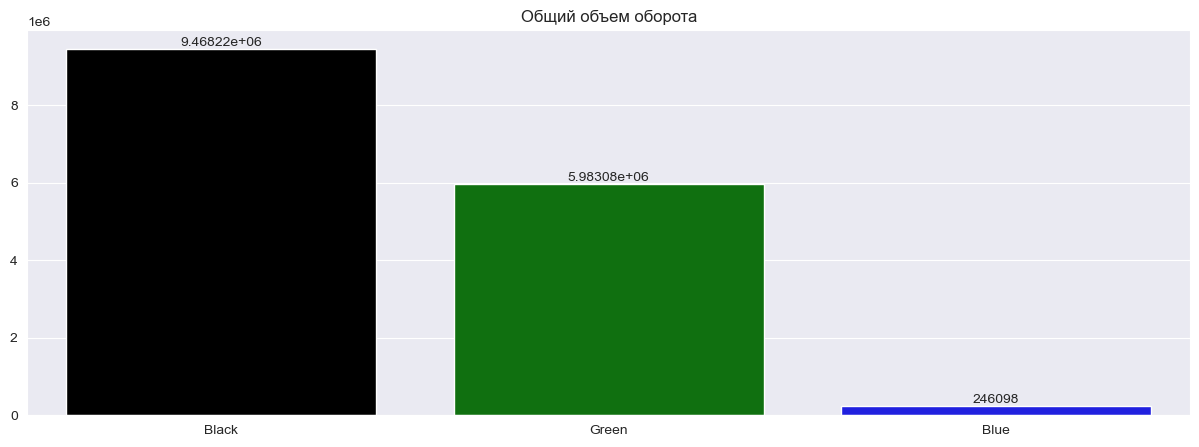

In [190]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=['Black', 'Green', 'Blue'], y=gmv, palette=['black', 'green', 'blue'])

plt.title('Общий объем оборота')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

Несмотря на доминацию по количеству аккаунов, компания Blue занимает последнее место по обороту товаров. На первом месте Black.

------------

Хотя информация по компаниям Red и Blue отсутствует, сравним количество успешных заказов между Black и Green

In [186]:
blackorders = data['Black_gvm_order_count'].sum()
greenorders = data['Green_gvm_order_count'].sum()
orders =[blackorders, greenorders]
orders

[4385.0, 7698.0]

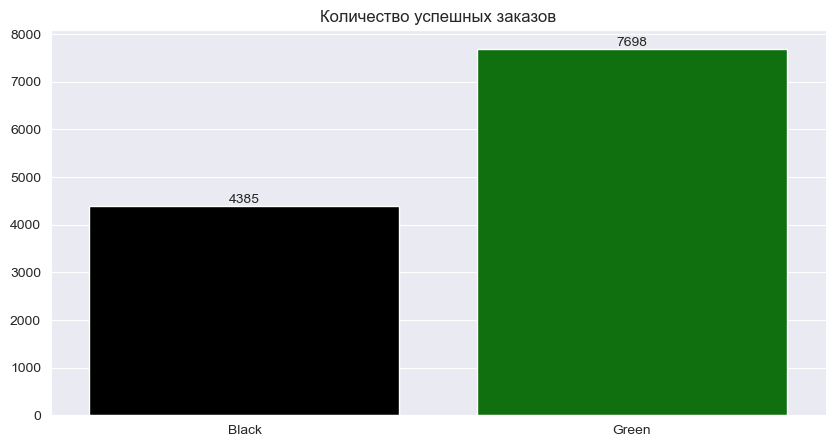

In [191]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=['Black', 'Green'], y=orders, palette=['black', 'green'])

plt.title('Количество успешных заказов')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

И снова, несмотря на доминацию Black, количество успешных заказов больше у Green

-----------------------

Рассмотрим распределение ПО, на котором установлено приложение по компаниям

In [193]:
blackapl = data['Black_apple'].sum()
greenapl = data['Green_apple'].sum()
blueapl = data['Blue_apple'].sum()
redapl = data['Red_apple'].sum()
apple = [blackapl, greenapl, blueapl, redapl]

blackandr = data['Black_android'].sum()
greenandr = data['Green_android'].sum()
blueandr = data['Blue_android'].sum()
redandr = data['Red_android'].sum()
android = [blackandr, greenandr, blueandr, redandr]

blackweb = data['Black_web'].sum()
greenweb = data['Green_web'].sum()
blueweb = data['Blue_web'].sum()
redweb = data['Red_web'].sum()
web = [blackweb, greenweb, blueweb, redweb]

blackapps = [blackapl, blackandr, blackweb]
greenapps = [greenapl, greenandr, greenweb]
blueapps = [blueapl, blueandr, blueweb]
redapps = [redapl, redandr, redweb]


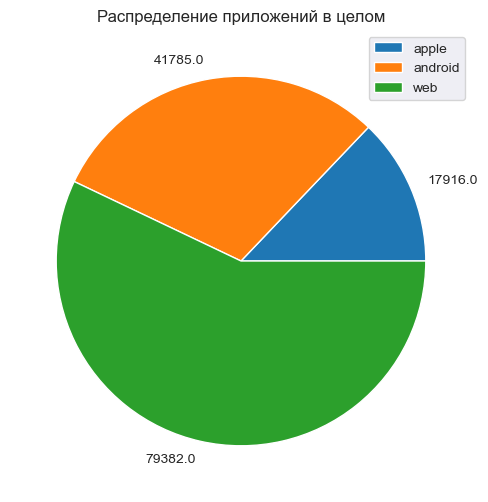

In [198]:
fig = plt.figure(figsize=[6,6])
plt.pie([sum(apple), sum(android), sum(web)], labels=[sum(apple), sum(android), sum(web)])

plt.title('Распределение приложений в целом')
plt.legend(['apple', 'android', 'web'])

plt.show()

Пользователи в основном пользуются приложением на ПК

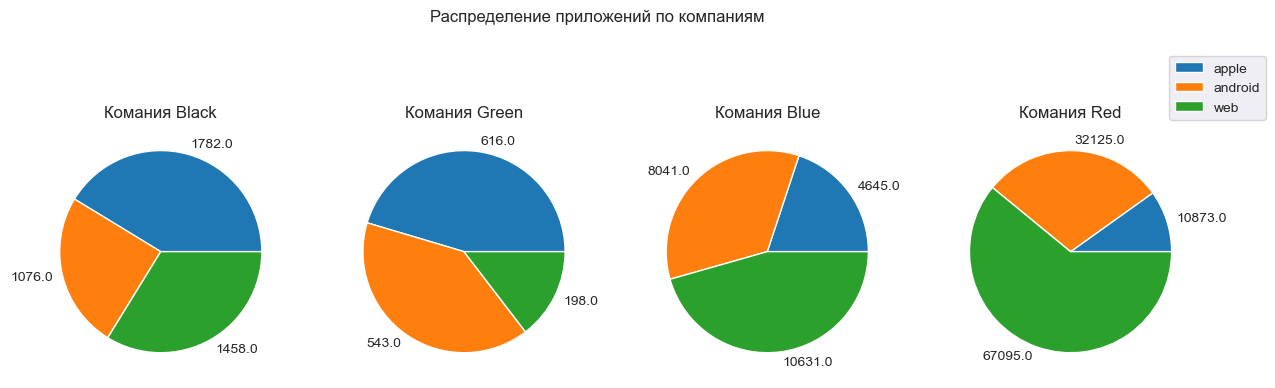

In [211]:
fig, axs = plt.subplots(ncols=4,figsize=[15,5])
axs[0].pie(blackapps, labels=blackapps)
axs[1].pie(greenapps, labels=greenapps)
axs[2].pie(blueapps, labels=blueapps)
axs[3].pie(redapps, labels=redapps)

axs[0].set_title('Комания Black')
axs[1].set_title('Комания Green')
axs[2].set_title('Комания Blue')
axs[3].set_title('Комания Red')

fig.suptitle('Распределение приложений по компаниям')
plt.legend(['apple', 'android', 'web'], bbox_to_anchor=(1.3, 1.3))

plt.show()

В компаниях Black и Green пользователи в основном пользуются приложением на apple, в Blue и Red - на ПК.

-----------------

Проверим, как активность влияет на сумарный gmv пользователя на примере компании Blue, т.к. нет информации об активности по другим компаниям.

In [235]:
#избавимся от сильных выбросов
active = sorted(data['Blue_activity_count'])[0:-1]
gmv = sorted(data['Blue_gmv_total'])[0:-1]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


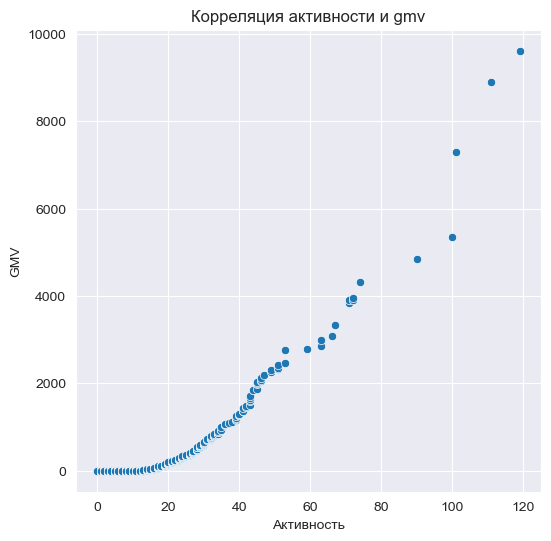

In [237]:
fig = plt.figure(figsize=[6,6])
sns.scatterplot(active, gmv)

plt.title('Корреляция активности и gmv')

plt.xlabel('Активность')
plt.ylabel('GMV')

plt.show()

На графике видно, что с увеличением активности увеличивается gmv и наоборот.